In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [2]:
data = pd.read_csv('./data_sunrun_RUN.csv')
data['date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)

In [3]:
data

,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
date,,,,,
2015-08-05,536,0.026535,0.131679,0.152896,10.77
2015-08-06,361,0.027022,0.056310,0.056473,8.77
2015-08-07,125,0.050128,0.100672,0.068661,10.14
2015-08-10,63,0.049206,0.122540,0.098798,10.12
2015-08-11,56,0.091375,0.129625,0.039154,9.79
...,...,...,...,...,...
2021-03-25,61,0.027705,0.125852,0.188192,53.00
2021-03-26,80,0.029212,0.169575,0.294971,57.09
2021-03-29,127,0.055646,0.157047,0.206850,51.91


# Import Data Normalized

In [4]:
data_normalized =  pd.read_csv('./data_sunrun_RUN_normalized.csv')

In [5]:
data_normalized

,Date,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
0,2015-08-05,0.554404,0.136924,0.272730,0.371615,0.066834
1,2015-08-06,0.373057,0.139435,0.099872,0.275538,0.045064
2,2015-08-07,0.128497,0.258662,0.201615,0.287682,0.059976
3,2015-08-10,0.064249,0.253906,0.251769,0.317711,0.059758
4,2015-08-11,0.056995,0.471497,0.268019,0.258280,0.056166
...,...,...,...,...,...,...
1406,2021-03-25,0.062176,0.142958,0.259367,0.406784,0.526505
1407,2021-03-26,0.081865,0.150737,0.359644,0.513181,0.571024
1408,2021-03-29,0.130570,0.287133,0.330912,0.425375,0.514640
1409,2021-03-30,0.130570,0.228951,0.384800,0.496810,0.580059


# Lag Analysis

In [6]:
max_lag = 100

In [7]:
def plot_cross_correlation(series_1, series_2, max_lag):
    fig, ax1 = plt.subplots(figsize = (18,5))
    ax1.xcorr(series_1, series_2, usevlines = True, maxlags = max_lag, normed=True)
    ax1.set_ylim(0,1)
    ax1.grid(True)
    plt.show()

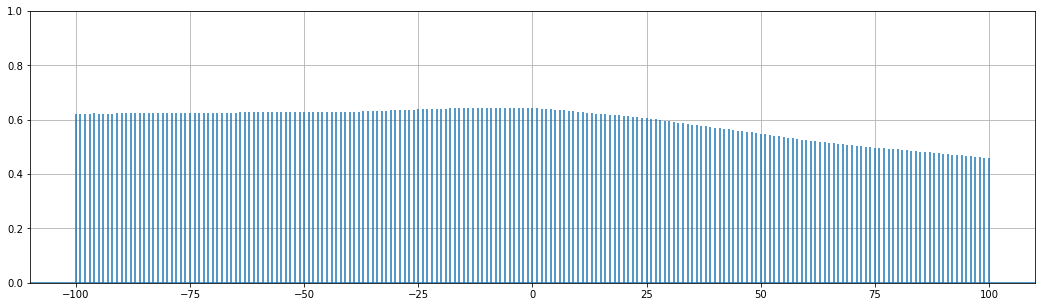

In [8]:
series_1 = data['pos_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

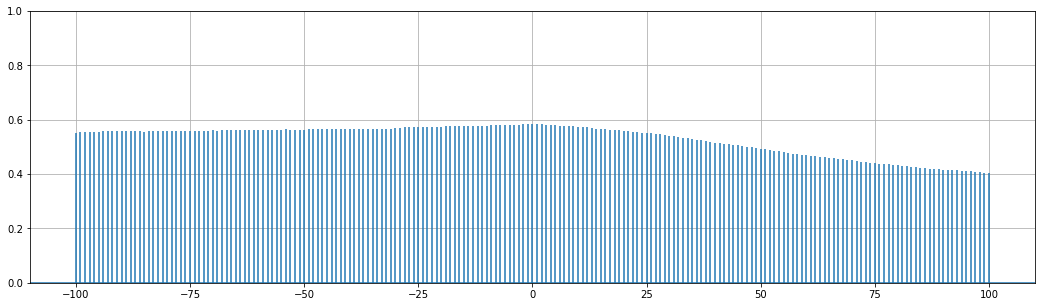

In [9]:
series_1 = data['neg_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

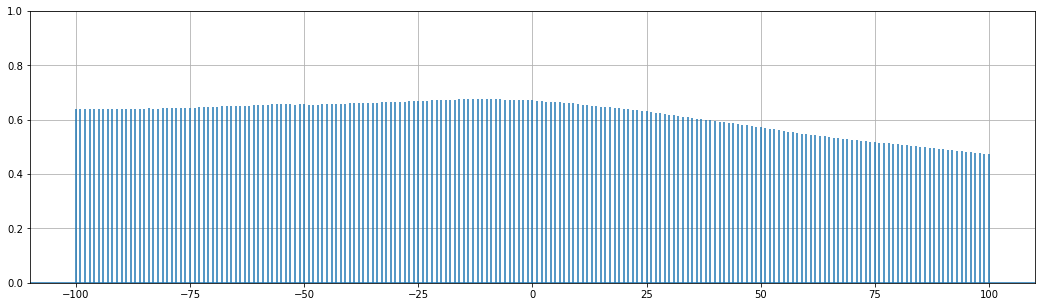

In [10]:
series_1 = data['compound_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

# Granger Causality 

In [11]:
data.columns

Index(['daily_tweets', 'neg_sentiment', 'pos_sentiment', 'compound_sentiment',
       'closing_price'],
      dtype='object')

In [12]:
input_data = np.asarray(data[['compound_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.2119 , p=0.0000  , df_denom=1407, df_num=1
ssr based chi2 test:   chi2=19.2528 , p=0.0000  , df=1
likelihood ratio test: chi2=19.1226 , p=0.0000  , df=1
parameter F test:         F=19.2119 , p=0.0000  , df_denom=1407, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.8032  , p=0.0004  , df_denom=1404, df_num=2
ssr based chi2 test:   chi2=15.6619 , p=0.0004  , df=2
likelihood ratio test: chi2=15.5755 , p=0.0004  , df=2
parameter F test:         F=7.8032  , p=0.0004  , df_denom=1404, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9275  , p=0.0021  , df_denom=1401, df_num=3
ssr based chi2 test:   chi2=14.8564 , p=0.0019  , df=3
likelihood ratio test: chi2=14.7785 , p=0.0020  , df=3
parameter F test:         F=4.9275  , p=0.0021  , df_denom=1401, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3592  , p=0.

{1: ({'ssr_ftest': (19.211877674721496, 1.256723933071901e-05, 1407.0, 1),
   'ssr_chi2test': (19.252841166565247, 1.1449985542774736e-05, 1),
   'lrtest': (19.12258164556806, 1.2258587418313537e-05, 1),
   'params_ftest': (19.21187767472123, 1.2567239330720976e-05, 1407.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (7.803154821803982, 0.0004264117413547349, 1404.0, 2),
   'ssr_chi2test': (15.66188766940429, 0.0003972503646142142, 2),
   'lrtest': (15.575481703160222, 0.0004147888959645704, 2),
   'params_ftest': (7.803154821795051, 0.0004264117413585328, 1404.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.927499616844421, 0.0020817269837914002, 1401.0, 3),
   'ssr_chi2test': (14.856358587830718, 0.0019436071268876612, 3),
   'lrtest': (14.778527965553621, 0.0020160346877614375, 3),
   'params_ftest': (4.927499616843328, 0.0020817269837946507, 1401.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.

In [13]:
input_data = np.asarray(data[['pos_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0022  , p=0.9625  , df_denom=1407, df_num=1
ssr based chi2 test:   chi2=0.0022  , p=0.9624  , df=1
likelihood ratio test: chi2=0.0022  , p=0.9624  , df=1
parameter F test:         F=0.0022  , p=0.9625  , df_denom=1407, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6121  , p=0.5423  , df_denom=1404, df_num=2
ssr based chi2 test:   chi2=1.2286  , p=0.5410  , df=2
likelihood ratio test: chi2=1.2281  , p=0.5412  , df=2
parameter F test:         F=0.6121  , p=0.5423  , df_denom=1404, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6255  , p=0.5986  , df_denom=1401, df_num=3
ssr based chi2 test:   chi2=1.8859  , p=0.5964  , df=3
likelihood ratio test: chi2=1.8846  , p=0.5967  , df=3
parameter F test:         F=0.6255  , p=0.5986  , df_denom=1401, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6715  , p=0.

{1: ({'ssr_ftest': (0.0022163805888494674, 0.9624573826876869, 1407.0, 1),
   'ssr_chi2test': (0.0022211063470346476, 0.9624107212390539, 1),
   'lrtest': (0.0022211045979929622, 0.9624107360282077, 1),
   'params_ftest': (0.0022163805887459405, 0.9624573826876869, 1407.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.61214403048279, 0.5423317983726648, 1404.0, 2),
   'ssr_chi2test': (1.228648061182694, 0.5410064755622255, 2),
   'lrtest': (1.2281126818124903, 0.5411513168006948, 2),
   'params_ftest': (0.6121440304827657, 0.5423317983726648, 1404.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6255004118604642, 0.5985559901438404, 1401.0, 3),
   'ssr_chi2test': (1.8858770447527489, 0.5964277282906103, 3),
   'lrtest': (1.8846151982816082, 0.5966970210119218, 3),
   'params_ftest': (0.6255004118601066, 0.5985559901440731, 1401.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
        

In [14]:
input_data = np.asarray(data[['daily_tweets', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.0081 , p=0.0001  , df_denom=1407, df_num=1
ssr based chi2 test:   chi2=16.0422 , p=0.0001  , df=1
likelihood ratio test: chi2=15.9516 , p=0.0001  , df=1
parameter F test:         F=16.0081 , p=0.0001  , df_denom=1407, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.5859  , p=0.0002  , df_denom=1404, df_num=2
ssr based chi2 test:   chi2=17.2329 , p=0.0002  , df=2
likelihood ratio test: chi2=17.1284 , p=0.0002  , df=2
parameter F test:         F=8.5859  , p=0.0002  , df_denom=1404, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4731  , p=0.0010  , df_denom=1401, df_num=3
ssr based chi2 test:   chi2=16.5013 , p=0.0009  , df=3
likelihood ratio test: chi2=16.4054 , p=0.0009  , df=3
parameter F test:         F=5.4731  , p=0.0010  , df_denom=1401, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1414  , p=0.

{1: ({'ssr_ftest': (16.008085273561576, 6.635476276824744e-05, 1407.0, 1),
   'ssr_chi2test': (16.042217651543584, 6.19457055025723e-05, 1),
   'lrtest': (15.951644162145385, 6.498131293150668e-05, 1),
   'params_ftest': (16.008085273561104, 6.635476276826336e-05, 1407.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.585894100432496, 0.0001967035214772019, 1404.0, 2),
   'ssr_chi2test': (17.23294129274841, 0.00018109828801558892, 2),
   'lrtest': (17.128408003271034, 0.00019081541675042784, 2),
   'params_ftest': (8.585894100431965, 0.00019670352147730706, 1404.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.473086249043587, 0.0009704987545216666, 1401.0, 3),
   'ssr_chi2test': (16.501296442512572, 0.000894846201555367, 3),
   'lrtest': (16.40535047094636, 0.0009363708786623897, 3),
   'params_ftest': (5.473086249043097, 0.0009704987545223415, 1401.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.,